In [1]:
import pandas as pd
import numpy as np
import datetime 
import math
from sklearn import linear_model
from matplotlib import pyplot as plt

In [2]:
%cd ..

c:\Users\Frank\OneDrive\Documents\git\delta_test_bnc


In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from bnc_tms import tms

In [5]:
#Dummy dates
ndays = int(60 * 7/5)
base = datetime.date.today()
dates = [base - datetime.timedelta(days = n) for n in range(ndays)]
dates = np.array([x for x in dates if x.weekday() not in [5,6]])

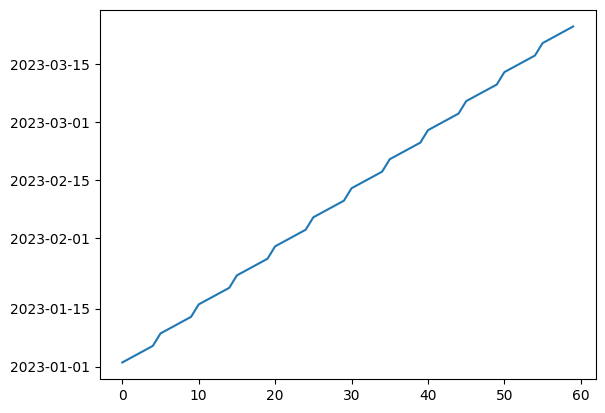

In [6]:
plt.plot(np.flip(dates))

In [7]:
#Dummy volume
vol = 10000
nrows = vol + np.array([int(vol * (2 + math.sin(i * 2*math.pi/5))) for i in range(ndays)])

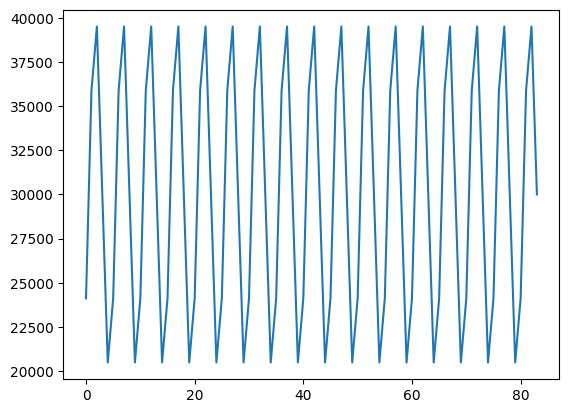

In [8]:
plt.plot(np.flip(nrows))

In [9]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [10]:
tms_model = tms.timeseries_model(df)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 1.0
Daily trend: NULL
Y lagged term: 0.999
Lag (days): 7.0
*****
Test alpha: 0.05
Residuals distribution: Gaussian
Observed volume: 30000
Expected volume: 29998.9819
0.95 CI: (29984.9929, 30012.9709)
p-value: 0.8866
Result: PASS
------------------------------------------


In [11]:
#Dummy volume
vol = 10000
nrows = np.array([int(vol * (2 + math.sin(i * 2*math.pi/5))) for i in range(ndays)])

sdev = int(vol/5)
nrows = nrows + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = vol + nrows - min(nrows)

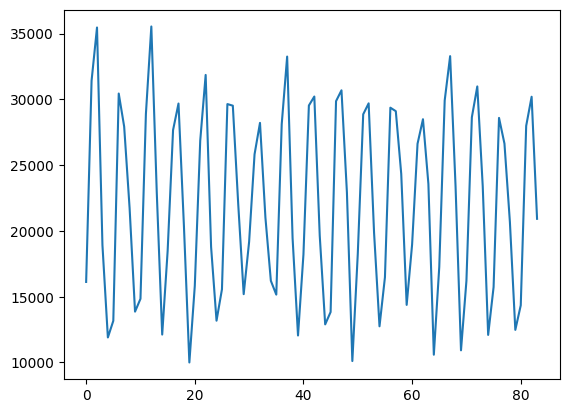

In [12]:
plt.plot(np.flip(nrows))

In [13]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [14]:
tms_model = tms.timeseries_model(df, use_empirical_residuals_pdf=True, alpha=0.025)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.87
Daily trend: -5.3421
Y lagged term: 0.9354
Lag (days): 7.0
*****
Test alpha: 0.025
Residuals distribution: Empirical
Observed volume: 20919
Expected volume: 20493.9098
0.975 CI: (15875.9615, 25869.968)
p-value: 0.7778
Result: PASS
------------------------------------------


In [15]:
#Dummy volume
vol = 10000
sdev = int(vol/300)
nrows = vol + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])

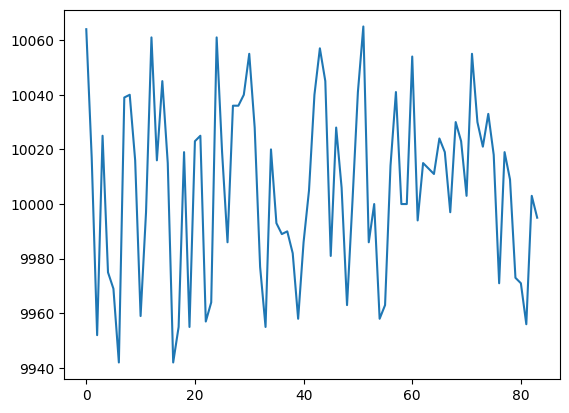

In [16]:
plt.plot(np.flip(nrows))

In [17]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [18]:
tms_model = tms.timeseries_model(df)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.12
Daily trend: -0.0061
Y lagged term: 0.3389
Lag (days): 1.0
*****
Test alpha: 0.05
Residuals distribution: Gaussian
Observed volume: 9995
Expected volume: 10005.9865
0.95 CI: (9954.9353, 10057.0376)
p-value: 0.6732
Result: PASS
------------------------------------------


In [19]:
#Dummy volume
vol = 10000
sdev = int(vol/20)
nrows = vol + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = nrows - 100 * np.array([i for i in range(len(nrows))])

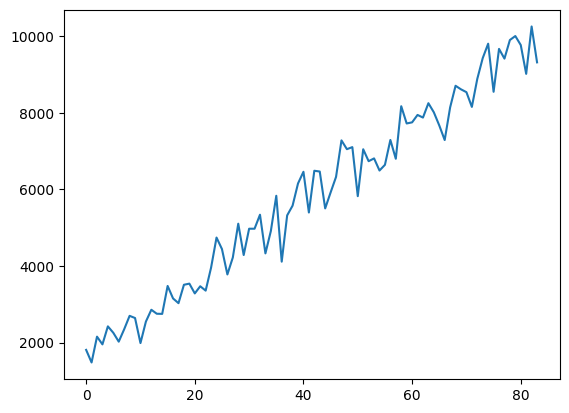

In [20]:
plt.plot(np.flip(nrows))

In [21]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [22]:
tms_model = tms.timeseries_model(df)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.91
Daily trend: 69.9308
Y lagged term: NULL
Lag (days): NULL
*****
Test alpha: 0.05
Residuals distribution: Gaussian
Observed volume: 9322
Expected volume: 9887.6262
0.95 CI: (8925.3313, 10849.9211)
p-value: 0.2493
Result: PASS
------------------------------------------
